<a href="https://colab.research.google.com/github/Tkundlas/Twitter-Sentiment-Analysis/blob/main/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [1]:
consumerKey='iL2KI650FefaLUj8X8yh0xKmo'
consumerSecret='bHfmdHDc9wIifVW26Gw9XqAGhpS9XyRAe6HxxWXGzUDtkUf38o'
accessToken='1195745298582106112-EZi82yH3RTahSCBMToXBFlERp7Fxqu'
accessTokenSecret='Fjk9XgOT3y7nug3Z6VXNBQbXrD10HoXRIR52wVdbiGqR7'

In [3]:
auth= tweepy.OAuthHandler(consumerKey,consumerSecret)

auth.set_access_token(accessToken,accessTokenSecret)

api=tweepy.API(auth,wait_on_rate_limit=True)

In [4]:
#fetching the tweets
#fetching the new tweets
posts= tweepy.Cursor(api.search,q='coronavirus',lang="en").items(200)
i=1
#fetching the old tweets
oldposts=tweepy.Cursor(api.search,q='coronavirus',lang="en", since='2020-04-01').items(200)
#creating a data frame for old and new tweets
for tweet in posts:
    df= pd.DataFrame([tweet.text for tweet in posts],columns=['Tweets'])
    oldf= pd.DataFrame([tweet.text for tweet in oldposts],columns=['Tweets'])


In [5]:
oldf.head()

,Tweets
0,RT @NFIB: ICYMI: Watch the latest webinar to l...
1,@Jim_Jordan The radical left attempts to tee u...
2,RT @supertanskiii: People must understand the ...
3,RT @Censelio: COVID-19: Sore throat now the mo...
4,ICYMI: Watch the latest webinar to learn more ...


In [6]:
df.head()

,Tweets
0,@Jim_Jordan The radical left attempts to tee u...
1,RT @supertanskiii: People must understand the ...
2,RT @Censelio: COVID-19: Sore throat now the mo...
3,ICYMI: Watch the latest webinar to learn more ...
4,RT @Humble_Analysis: NZ vaccinated their entir...


In [7]:
#cleaning the data
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9,.'']+','',text) #remove @mentions
    text=re.sub(r'#','',text) #Removing the # symbol
    text=re.sub(r'https?:\/\/\S+','',text)#remove hyperlink
    text=re.sub(r'RT[\s]+','',text)#removing RT
    
    return text
#cleaning the new data
df['Tweets']=df['Tweets'].apply(cleanTxt)

#show the cleaned text
df

,Tweets
0,_Jordan The radical left attempts to tee up a ...
1,: People must understand the reason the heatwa...
2,: COVID-19: Sore throat now the most common co...
3,ICYMI: Watch the latest webinar to learn more ...
4,_Analysis: NZ vaccinated their entire adult po...
...,...
194,Here it is again: in…
195,Which Hartford Metro Area Has Reported The Mos...
196,thetimes: 'Around 3.5m Britons caught coronavi...
197,": Total deaths per 1M/pop., 7/14:\n\n1. MS 4,2..."


In [8]:
#cleaning the old data
oldf['Tweets']=oldf['Tweets'].apply(cleanTxt)
#printing
oldf

,Tweets
0,: ICYMI: Watch the latest webinar to learn mor...
1,_Jordan The radical left attempts to tee up a ...
2,: People must understand the reason the heatwa...
3,: COVID-19: Sore throat now the most common co...
4,ICYMI: Watch the latest webinar to learn more ...
...,...
195,Here it is again: in…
196,Which Hartford Metro Area Has Reported The Mos...
197,thetimes: 'Around 3.5m Britons caught coronavi...
198,": Total deaths per 1M/pop., 7/14:\n\n1. MS 4,2..."


In [9]:
#create a function to get subjectivity (to tell its a opinion or not)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#create a function for polarity (to tell its +ve or -ve)
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
#create two new columns
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,_Jordan The radical left attempts to tee up a ...,0.000000,0.000000
1,: People must understand the reason the heatwa...,0.000000,0.000000
2,: COVID-19: Sore throat now the most common co...,0.500000,0.100000
3,ICYMI: Watch the latest webinar to learn more ...,0.700000,0.500000
4,_Analysis: NZ vaccinated their entire adult po...,0.308333,0.033333
...,...,...,...
194,Here it is again: in…,0.000000,0.000000
195,Which Hartford Metro Area Has Reported The Mos...,0.500000,0.500000
196,thetimes: 'Around 3.5m Britons caught coronavi...,0.066667,0.000000
197,": Total deaths per 1M/pop., 7/14:\n\n1. MS 4,2...",0.750000,0.000000


In [10]:
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,_Jordan The radical left attempts to tee up a ...,0.000000,0.000000,Neutral
1,: People must understand the reason the heatwa...,0.000000,0.000000,Neutral
2,: COVID-19: Sore throat now the most common co...,0.500000,0.100000,Positive
3,ICYMI: Watch the latest webinar to learn more ...,0.700000,0.500000,Positive
4,_Analysis: NZ vaccinated their entire adult po...,0.308333,0.033333,Positive
...,...,...,...,...
194,Here it is again: in…,0.000000,0.000000,Neutral
195,Which Hartford Metro Area Has Reported The Mos...,0.500000,0.500000,Positive
196,thetimes: 'Around 3.5m Britons caught coronavi...,0.066667,0.000000,Neutral
197,": Total deaths per 1M/pop., 7/14:\n\n1. MS 4,2...",0.750000,0.000000,Neutral


In [11]:
oldf['Subjectivity']=oldf['Tweets'].apply(getSubjectivity)
oldf['Polarity']=oldf['Tweets'].apply(getPolarity)

oldf

,Tweets,Subjectivity,Polarity
0,: ICYMI: Watch the latest webinar to learn mor...,0.700000,0.500000
1,_Jordan The radical left attempts to tee up a ...,0.000000,0.000000
2,: People must understand the reason the heatwa...,0.000000,0.000000
3,: COVID-19: Sore throat now the most common co...,0.500000,0.100000
4,ICYMI: Watch the latest webinar to learn more ...,0.700000,0.500000
...,...,...,...
195,Here it is again: in…,0.000000,0.000000
196,Which Hartford Metro Area Has Reported The Mos...,0.500000,0.500000
197,thetimes: 'Around 3.5m Britons caught coronavi...,0.066667,0.000000
198,": Total deaths per 1M/pop., 7/14:\n\n1. MS 4,2...",0.750000,0.000000


In [12]:
oldf['Analysis']=oldf['Polarity'].apply(getAnalysis)
oldf

,Tweets,Subjectivity,Polarity,Analysis
0,: ICYMI: Watch the latest webinar to learn mor...,0.700000,0.500000,Positive
1,_Jordan The radical left attempts to tee up a ...,0.000000,0.000000,Neutral
2,: People must understand the reason the heatwa...,0.000000,0.000000,Neutral
3,: COVID-19: Sore throat now the most common co...,0.500000,0.100000,Positive
4,ICYMI: Watch the latest webinar to learn more ...,0.700000,0.500000,Positive
...,...,...,...,...
195,Here it is again: in…,0.000000,0.000000,Neutral
196,Which Hartford Metro Area Has Reported The Mos...,0.500000,0.500000,Positive
197,thetimes: 'Around 3.5m Britons caught coronavi...,0.066667,0.000000,Neutral
198,": Total deaths per 1M/pop., 7/14:\n\n1. MS 4,2...",0.750000,0.000000,Neutral


In [13]:
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0])*100,1)

46.2

In [14]:
ptweets=df[df.Analysis=='Negative']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0])*100,1)

12.1

In [15]:
ptweets=df[df.Analysis=='Neutral']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0])*100,1)

41.7

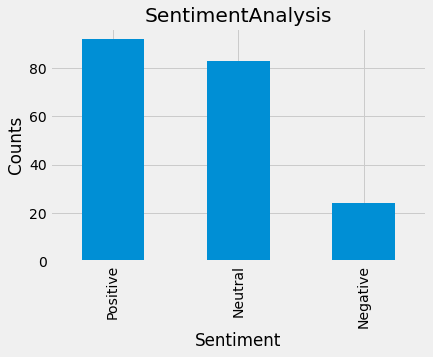

In [16]:
df['Analysis'].value_counts()

plt.title('SentimentAnalysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()